## Examine effects of hydrophobicity and proline substitutions

Authored by Arjun Aditham. This notebook looks at hydrophobicity and proline substitutions. This notebook produces the underlying data and settings for Fig S3, and to some extent Fig S4. This relies on the final entry functional effects file 'HEK293T_entry_func_effects.csv'. Note that this notebook was originally run in the directory with this same data file. This is solely meant to archive that analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as pl
import altair as alt
alt.data_transformers.disable_max_rows()

## Pull in data, initial checks

In [7]:
functional_data_clipped = pd.read_csv('HEK293T_entry_func_effects.csv');
functional_data_unclipped = pd.read_csv('HEK293T_entry_func_effects_Unclipped.csv');



In [8]:
merged_dfs = pd.merge(functional_data_clipped,functional_data_unclipped,how='left',on=['site','wildtype','mutant']);

#filter for times_seen
merged_dfs = merged_dfs[merged_dfs['times_seen_x']>=2];
merged_dfs = merged_dfs[merged_dfs['times_seen_y']>=2];

In [10]:
# # Define Altair chart
# chart = alt.Chart(merged_dfs,width=600, height=600).mark_circle(size=90).encode(
#     y='effect_x',
#     x='effect_y',
#     tooltip=['site','wildtype','mutant'],# Specify the column you want to display in the tooltip
#     color=alt.condition(
#         alt.datum.mutant == '*',  # Condition for coloring
#         alt.value('orange'),  # Color for category 'A'
#         alt.value('teal')# Color for category 'B'
#     )
# )

# chart.display()

chart = alt.Chart(merged_dfs,width=600, height=600).mark_circle(size=90).encode(
    x=alt.X('effect_y', axis=alt.Axis(title='Functional Effect, median_stop clipping')),
    y=alt.Y('effect_x', axis=alt.Axis(title='Functional Effect, clip to -5')),
    tooltip=['site','wildtype','mutant','times_seen_x'],# Specify the column you want to display in the tooltip
    color=alt.condition(
        alt.datum.mutant == '*',  # Condition for coloring
        alt.value('orange'),  # Color for category 'A'
        alt.value('teal')# Color for category 'B'
    )
)

chart.display()


alt.Chart(...)

In [11]:
functional_data_clipped['str_site']=functional_data_clipped['site'].apply(lambda x: str(x));
functional_data_clipped['mutation']=functional_data_clipped['wildtype']+functional_data_clipped['str_site']+functional_data_clipped['mutant']


In [12]:
validation_subset = ['WT','N336S','H270P','I338T','L11I','R346M','N336G','I268S','N319A','G343R','G229S','R333E','V296Y','S341D','S341Y','E269A']
functional_data_clipped[functional_data_clipped['mutation'].isin(validation_subset)]

,site,wildtype,mutant,effect,effect_std,times_seen,n_selections,str_site,mutation
260,11,L,I,0.44200,0.3010,5.750,8,11,L11I
4781,229,G,S,-0.60720,0.1635,27.620,8,229,G229S
5583,268,I,S,-3.77100,0.6977,10.880,8,268,I268S
5589,269,E,A,-1.31200,0.3191,9.875,8,269,E269A
5621,270,H,P,-6.75100,0.7998,7.625,8,270,H270P
6166,296,V,Y,-3.51000,0.7411,9.500,8,296,V296Y
6623,319,N,A,-7.00400,0.4302,6.250,8,319,N319A
6916,333,R,E,-1.22100,0.8365,7.750,8,333,R333E
6979,336,N,G,0.15110,1.0300,5.500,8,336,N336G
6989,336,N,S,0.33590,0.3007,9.750,8,336,N336S


## Examine data for hydrophobicity and proline substitutions

In [13]:
#We want to look at some mutations that could be interesting from a functional selection standpoint.
#one thing Naveen wanted to know was which mutations seem to tolerate most other mutations except for
#breaking residues (namely proline)


functional_data = pd.read_csv('HEK293T_entry_func_effects.csv');

In [15]:
#okay let's filter times_seen >= 2
functional_data=functional_data[functional_data['times_seen']>=2];


In [17]:
#let's jsut make some basic barplots of the domain/linker

ectodomain_annotations = pd.read_csv('241106_RABV-G_Ecto_linkers.csv');
functional_data = pd.merge(functional_data,ectodomain_annotations, on=['site']);


functional_data_nostop = functional_data[functional_data['mutant']!='*']

In [18]:
functional_data_nostop

,site,wildtype,mutant,effect,effect_std,times_seen,n_selections,domain,AG_site
1,1,K,A,0.01087,0.3305,7.250,8,Central_Domain,NaN
2,1,K,C,-1.06400,0.8301,6.000,8,Central_Domain,NaN
3,1,K,D,0.10530,1.2990,5.875,8,Central_Domain,NaN
4,1,K,E,-0.01455,1.0580,8.500,8,Central_Domain,NaN
5,1,K,F,-2.18700,2.7750,10.500,8,Central_Domain,NaN
...,...,...,...,...,...,...,...,...,...
7718,402,P,S,-0.34170,0.2481,31.500,8,C-term,NaN
7719,402,P,T,-0.41760,0.1477,19.250,8,C-term,NaN
7720,402,P,V,-0.50370,0.3311,9.625,8,C-term,NaN
7721,402,P,W,-0.53980,0.4191,13.380,8,C-term,NaN


In [19]:
#okay we need to clip this at -5
functional_data_nostop['effect_floor']=functional_data_nostop['effect'].clip(lower=-5)



/tmp/ipykernel_50595/4236544216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  functional_data_nostop['effect_floor']=functional_data_nostop['effect'].clip(lower=-5)


In [20]:
#okay so now we want to go ahead and per site, get the proline result functional effects versus others

def avg_func_effect_categorized(df):
    df_copy = df.copy();

    #get rid of stop codons since not all had those. Deletions are also removed as non-encoded
    df_copy_subset = df_copy[df_copy['mutant']!='*'];
    df_copy_subset = df_copy_subset[df_copy_subset['mutant']!='-'];

    #get specific things I want. Get proline only versus all others
    proline_df = df_copy_subset[df_copy_subset['mutant']=='P'];
    others_df = df_copy_subset[df_copy_subset['mutant']!='P']

    proline_effect = proline_df['effect'].tolist();

    others_effect_list = others_df['effect'].tolist();
    others_effect = np.mean(others_effect_list);

    #save values
    df_copy['effect_proline']= np.mean(proline_effect);
    df_copy['effect_all_others']=others_effect;


    #okay let's try looking at polar vs hydrophobic residues
    
    hydrophobes = ['L','V','F','Y','I','W','M','A'];
    hydrophobes_df = df_copy_subset[df_copy_subset['mutant'].isin(hydrophobes)==True]

    special_residues = ['P','G','C'];
    
    nonhydrophobes_df = df_copy_subset[df_copy_subset['mutant'].isin(hydrophobes)==False]
    nonhydrophobes_df = nonhydrophobes_df[nonhydrophobes_df['mutant'].isin(special_residues)==False]


    nonhydrophobes_effect_list = nonhydrophobes_df['effect'].tolist();
    nonhydrophobes_effect = np.mean(nonhydrophobes_effect_list); 


    hydrophobes_effect_list = hydrophobes_df['effect'].tolist();
    hydrophobes_effect = np.mean(hydrophobes_effect_list); 

    #save values
    df_copy['effect_hydrophobes']=hydrophobes_effect;
    df_copy['effect_nonhydrophobes']=nonhydrophobes_effect;

    charge = ['K','R','H','D','E'];
    polar = ['S','T','N','Q'];
    df_copy.loc[df_copy['wildtype'].isin(hydrophobes), 'native_residue_type'] = 'hydrophobic'
    df_copy.loc[df_copy['wildtype'].isin(special_residues), 'native_residue_type'] = 'other'
    df_copy.loc[df_copy['wildtype'].isin(charge), 'native_residue_type'] = 'charged'
    df_copy.loc[df_copy['wildtype'].isin(polar), 'native_residue_type'] = 'polar'
    

    return df_copy;
    


In [21]:
#okay let's try grouping by site and then passing through function
functional_data['effect'] = functional_data['effect'].clip(lower=-5);
functional_data = functional_data[functional_data['mutant']!='*'];
functional_data = functional_data[functional_data['mutant']!='-'];

functional_data_grouped = functional_data.groupby('site');


In [22]:
functional_data_grouped=functional_data_grouped.apply(avg_func_effect_categorized);

/home/aaditham/miniconda3/envs/dms-vep-pipeline-3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/aaditham/miniconda3/envs/dms-vep-pipeline-3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/aaditham/miniconda3/envs/dms-vep-pipeline-3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/aaditham/miniconda3/envs/dms-vep-pipeline-3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/aaditham/miniconda3/envs/dms-vep-pipeline-3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtyp

In [23]:
functional_data_grouped

site wildtype mutant   effect  effect_std  times_seen  \
site                                                               
1    1        1        K      A  0.01087      0.3305       7.250   
     2        1        K      C -1.06400      0.8301       6.000   
     3        1        K      D  0.10530      1.2990       5.875   
     4        1        K      E -0.01455      1.0580       8.500   
     5        1        K      F -2.18700      2.7750      10.500   
...         ...      ...    ...      ...         ...         ...   
402  7718   402        P      S -0.34170      0.2481      31.500   
     7719   402        P      T -0.41760      0.1477      19.250   
     7720   402        P      V -0.50370      0.3311       9.625   
     7721   402        P      W -0.53980      0.4191      13.380   
     7722   402        P      Y -0.25920      0.2644       9.625   

           n_selections          domain AG_site  effect_proline  \
site                                                              
1    1                8  Central_Domain     NaN            -5.0   
     2                8  Central_Domain     NaN            -5.0   
     3                8  Central_Domain     NaN            -5.0   
     4                8  Central_Domain     NaN            -5.0   
     5                8  Central_Domain     NaN            -5.0   
...                 ...             ...     ...             ...   
402  7718             8          C-term     NaN             NaN   
     7719             8          C-term     NaN             NaN   
     7720             8          C-term     NaN             NaN   
     7721             8          C-term     NaN             NaN   
     7722             8          C-term     NaN             NaN   

           effect_all_others  effect_hydrophobes  effect_nonhydrophobes  \
site                                                                      
1    1             -0.941458           -1.480741              -0.513611   
     2             -0.941458           -1.480741              -0.513611   
     3             -0.941458           -1.480741              -0.513611   
     4             -0.941458           -1.480741              -0.513611   
     5             -0.941458           -1.480741              -0.513611   
...                      ...                 ...                    ...   
402  7718          -0.727132           -0.487438              -1.010322   
     7719          -0.727132           -0.487438              -1.010322   
     7720          -0.727132           -0.487438              -1.010322   
     7721          -0.727132           -0.487438              -1.010322   
     7722          -0.727132           -0.487438              -1.010322   

          native_residue_type  
site                           
1    1                charged  
     2                charged  
     3                charged  
     4                charged  
     5                charged  
...                       ...  
402  7718               other  
     7719               other  
     7720               other  
     7721               other  
     7722               other  

[7611 rows x 14 columns]

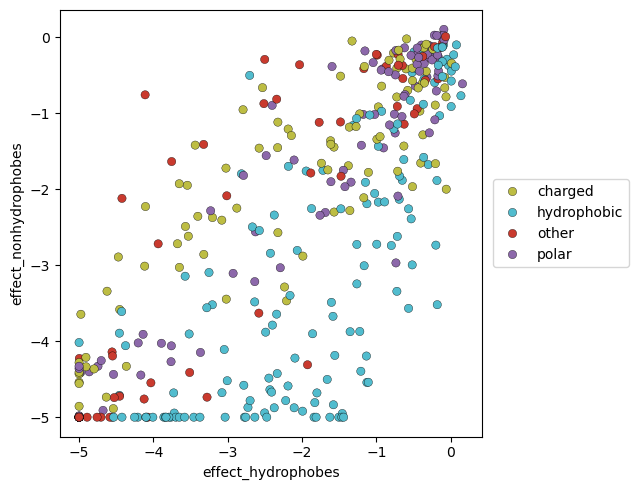

In [24]:
#okay so this looks like it ran okay. let me try and plot.

#drop duplicates
functional_data_grouped_noduplicates = functional_data_grouped.drop_duplicates(subset=['site'])
functional_data_grouped_noduplicates = functional_data_grouped_noduplicates[functional_data_grouped_noduplicates['domain']!='stop'];

# Create an array with the colors you want to use
colors = ["#bdbd43", "#51bcce",'#c93a2e','#8c68aa']
# Set your custom color palette
sb.set_palette(sb.color_palette(colors))


fig,ax=pl.subplots(figsize=(6.5,5))
g= sb.scatterplot(data=functional_data_grouped_noduplicates, x= 'effect_hydrophobes',y='effect_nonhydrophobes',hue='native_residue_type',edgecolor='k',linewidth=0.25)

pl.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1)
pl.tight_layout()

#re-color points in illustrator
#fig.savefig('241009_Hydrophobe_effect.eps')

In [25]:
import altair as alt

In [40]:


# Define Altair chart
chart = alt.Chart(functional_data_grouped_noduplicates,width=600, height=600).mark_circle(size=90).encode(
    x='effect_proline',
    y='effect_all_others',
    tooltip=['wildtype','times_seen','effect_proline','effect_all_others'],  # Specify the column you want to display in the tooltip
    color=alt.condition(
        alt.datum.native_residue == 'H270',  # Condition for coloring
        alt.value('red'),  # Color for category 'A'
        alt.value('blue')# Color for category 'B'
    )
)


functional_data_grouped_noduplicates = functional_data_grouped_noduplicates.reset_index(drop=True)

In [41]:
functional_data_grouped_noduplicates

,site,wildtype,mutant,effect,effect_std,times_seen,n_selections,domain,AG_site,effect_proline,effect_all_others,effect_hydrophobes,effect_nonhydrophobes,native_residue_type
0,1,K,A,0.01087,0.33050,7.250,8,Central_Domain,NaN,-5.000,-0.941458,-1.480741,-0.513611,charged
1,2,F,A,-2.92500,0.26950,10.120,8,Central_Domain,NaN,-4.123,-2.565711,-2.063543,-2.806444,hydrophobic
2,3,P,A,-0.14290,0.09371,8.500,8,Central_Domain,NaN,NaN,-3.378489,-3.935487,-2.719156,other
3,4,I,A,-2.39300,0.34320,6.500,8,Central_Domain,NaN,-3.151,-2.184544,-1.871257,-2.255889,hydrophobic
4,5,Y,A,-5.00000,0.50710,3.500,8,Central_Domain,NaN,-5.000,-5.000000,-5.000000,-5.000000,hydrophobic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,398,P,A,-1.21300,0.39480,11.880,8,Linker,NaN,NaN,-3.248153,-2.580362,-3.631222,other
398,399,L,A,-1.97600,0.84920,12.750,8,Linker,NaN,-5.000,-3.177761,-1.107100,-4.540667,hydrophobic
399,400,A,C,-0.04314,0.19200,14.000,8,C-term,NaN,-4.559,-0.305237,-0.109157,-0.518833,hydrophobic
400,401,D,A,-1.27600,0.49550,6.625,8,C-term,NaN,-4.237,-1.655450,-1.737625,-1.659263,charged


In [42]:
# Display the plot
chart.display()

alt.Chart(...)

In [43]:
#drop duplicates
functional_data_grouped_noduplicates = functional_data_grouped.drop_duplicates(subset=['site'])

#it would be better to diplay native residue
functional_data_grouped_noduplicates['site_string']=functional_data_grouped_noduplicates['site'].apply(lambda x: str(x))
functional_data_grouped_noduplicates['native_residue']=functional_data_grouped_noduplicates['wildtype']+functional_data_grouped_noduplicates['site_string']


functional_data_grouped_noduplicates.reset_index(drop=True,inplace=True)

/tmp/ipykernel_50595/1241415710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  functional_data_grouped_noduplicates['site_string']=functional_data_grouped_noduplicates['site'].apply(lambda x: str(x))
/tmp/ipykernel_50595/1241415710.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  functional_data_grouped_noduplicates['native_residue']=functional_data_grouped_noduplicates['wildtype']+functional_data_grouped_noduplicates['site_string']


In [44]:
functional_data_grouped_noduplicates.columns

Index(['site', 'wildtype', 'mutant', 'effect', 'effect_std', 'times_seen',
       'n_selections', 'domain', 'AG_site', 'effect_proline',
       'effect_all_others', 'effect_hydrophobes', 'effect_nonhydrophobes',
       'native_residue_type', 'site_string', 'native_residue'],
      dtype='object')

In [45]:
# Define Altair chart
chart = alt.Chart(functional_data_grouped_noduplicates,width=600, height=600).mark_circle(size=90).encode(
    y='effect_nonhydrophobes',
    x='effect_hydrophobes',
    tooltip=['native_residue','times_seen','effect_nonhydrophobes','effect_hydrophobes'],# Specify the column you want to display in the tooltip
    color=alt.condition(
        alt.datum.native_residue == 'H270',  # Condition for coloring
        alt.value('red'),  # Color for category 'A'
        alt.value('blue')# Color for category 'B'
    )
)


chart.display()
#chart.save('test_hydrophobe_plot.html')

alt.Chart(...)

In [50]:
#maybe what i should try and do is measure a residual from a 1:1 line. I'd fit a linear model but it could outsway by outliers.

#assume the model is y=x. So I'll calculate the residual by effect_alanine - effect_hydrophobe. This will be directional -- negative values indicate hydrophobes are favored.

functional_data_grouped_noduplicates['residual_hydrophobicity'] = functional_data_grouped_noduplicates['effect_nonhydrophobes']-functional_data_grouped_noduplicates['effect_hydrophobes'];



/tmp/ipykernel_50595/3368101404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  functional_data_grouped_noduplicates['residual_hydrophobicity'] = functional_data_grouped_noduplicates['effect_nonhydrophobes']-functional_data_grouped_noduplicates['effect_hydrophobes'];


/tmp/ipykernel_50595/2926035276.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  functional_data_grouped_noduplicates['site_string']=functional_data_grouped_noduplicates['site'].apply(lambda x: str(x))
/tmp/ipykernel_50595/2926035276.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  functional_data_grouped_noduplicates['native_residue']=functional_data_grouped_noduplicates['wildtype']+functional_data_grouped_noduplicates['site_string']


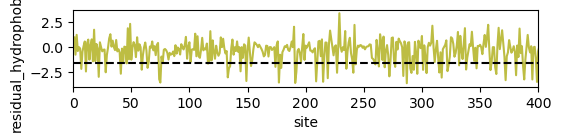

In [51]:
fig,ax=pl.subplots(figsize=(6,1))
sb.lineplot(data=functional_data_grouped_noduplicates, x= 'site',y='residual_hydrophobicity')

mean = np.mean(functional_data_grouped_noduplicates['residual_hydrophobicity']);
std = np.std(functional_data_grouped_noduplicates['residual_hydrophobicity']);

enriched = mean-(std);

pl.plot([0,420],[enriched,enriched,],'k--')

pl.xlim(0,400)
#it would be better to diplay native residue
functional_data_grouped_noduplicates['site_string']=functional_data_grouped_noduplicates['site'].apply(lambda x: str(x))
functional_data_grouped_noduplicates['native_residue']=functional_data_grouped_noduplicates['wildtype']+functional_data_grouped_noduplicates['site_string']

#fig.savefig('241009_residual_lineplot.eps')

In [52]:
min(functional_data_grouped_noduplicates['residual_hydrophobicity'])

-3.5605942857142856

In [54]:
max(functional_data_grouped_noduplicates['residual_hydrophobicity'])

3.3516472222222222

In [56]:
mean

-0.37213940412520735

In [55]:
std

1.1470277628904832

In [66]:
list_preferred_sites = functional_data_grouped_noduplicates[functional_data_grouped_noduplicates['residual_hydrophobicity']<=(-0.37-1.147)].site.unique()

In [70]:
list_preferred_sites

string_residues = '';
for i in list_preferred_sites:
    string_residues = string_residues+str(i)+'+';
    

In [71]:
#residues to highlight in PDB structure

string_residues

'7+11+22+28+41+43+46+59+64+74+75+116+133+134+135+144+149+153+174+177+179+191+192+209+215+219+227+235+241+243+260+263+268+272+277+284+287+290+291+293+296+301+304+315+317+322+323+332+338+347+359+363+364+372+381+387+388+395+399+'

In [59]:
functional_data_grouped_noduplicates.to_csv('240422_sample_analyses_proline-effect_hydrophobe-effect.csv');

In [60]:


#it would be better to diplay native residue
functional_data_grouped['site_string']=functional_data_grouped['site'].apply(lambda x: str(x))
functional_data_grouped['native_residue']=functional_data_grouped['wildtype']+functional_data_grouped['site_string']


functional_data_grouped.reset_index(drop=True,inplace=True)

In [ ]:
functional_data_grouped.to_csv('240424_sample_analyses_proline-effect_hydrophobe-effect.csv');